In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ---- Step 1: Prepare and combine all 4 tables ---- #

In [2]:


tables = []

# Table 1
tables.append({
    'Phase': ['Stage 1']*3 + ['Stage 2']*3,
    'LLM': ['ChatGPT', 'DeepSeek', 'Gemini']*2,
    'Readability': [70.09, 70.26, 75.1, 66.67, 76.15, 84.47],
    'Vocabulary Richness': [0.71, 0.74, 0.63, 0.89, 0.83, 0.77],
    'Coherence Similarity': [0.63, 0.63, 0.63, 0.28, 0.28, 0.28],
    'Sentiment Polarity': [0.068, 0.0, 0.002, 0.031, -0.025, 0.106],
    'Grammar Spelling': [9, 28, 0, 0, 0, 0]
})

# Table 2
tables.append({
    'Phase': ['Stage 1']*3 + ['Stage 2']*3,
    'LLM': ['ChatGPT', 'DeepSeek', 'Gemini']*2,
    'Readability': [46.47, 52.76, 38.82, 0.58, 19.57, 14.7],
    'Vocabulary Richness': [0.82, 0.74, 0.65, 0.81, 0.72, 0.66],
    'Coherence Similarity': [0.48, 0.48, 0.48, 0.54, 0.54, 0.54],
    'Sentiment Polarity': [0.064, 0.086, 0.047, 0.026, 0.056, 0.123],
    'Grammar Spelling': [0, 0, 0, 4, 0, 1]
})

# Table 3
tables.append({
    'Phase': ['Stage 1']*3 + ['Stage 2']*3,
    'LLM': ['ChatGPT', 'DeepSeek', 'Gemini']*2,
    'Readability': [17.34, 22.00, 44.03, 16.35, 1.86, 18.86],
    'Vocabulary Richness': [0.73, 0.58, 0.52, 0.73, 0.78, 0.58],
    'Coherence Similarity': [0.65, 0.65, 0.65, 0.48, 0.48, 0.48],
    'Sentiment Polarity': [0.058, 0.075, 0.046, 0.127, 0.060, 0.114],
    'Grammar Spelling': [0, 13, 1, 1, 1, 0]
})

# Table 4
tables.append({
    'Phase': ['Stage 1']*3 + ['Stage 2']*3,
    'LLM': ['ChatGPT', 'DeepSeek', 'Gemini']*2,
    'Readability': [64.00, 68.06, 55.34, 31.38, 33.92, 38.72],
    'Vocabulary Richness': [0.77, 0.62, 0.64, 0.57, 0.65, 0.51],
    'Coherence Similarity': [0.62, 0.62, 0.62, 0.73, 0.73, 0.73],
    'Sentiment Polarity': [0.230, 0.144, 0.080, 0.075, 0.035, 0.024],
    'Grammar Spelling': [0, 18, 1, 28, 21, 13]
})

In [3]:
# Combine into one DataFrame
all_dfs = []
for idx, t in enumerate(tables):
    df = pd.DataFrame(t)
    df['Table'] = f'Table {idx+1}'
    all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)

# Fill missing values (e.g., Coherence Similarity)
#df_all['Coherence Similarity'] = df_all.groupby('LLM')['Coherence Similarity'].transform(lambda x: x.fillna(x.mean()))

# Invert Grammar Spelling (fewer errors = better)
df_all['Grammar Spelling'] = -df_all['Grammar Spelling']

# Normalize all metrics
metrics = ['Readability', 'Vocabulary Richness', 'Coherence Similarity', 'Sentiment Polarity', 'Grammar Spelling']
scaler = MinMaxScaler()
df_all[metrics] = scaler.fit_transform(df_all[metrics])

# Total Score
df_all['Total Score'] = df_all[metrics].sum(axis=1)

C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3608151001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3608151001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3608151001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipyker

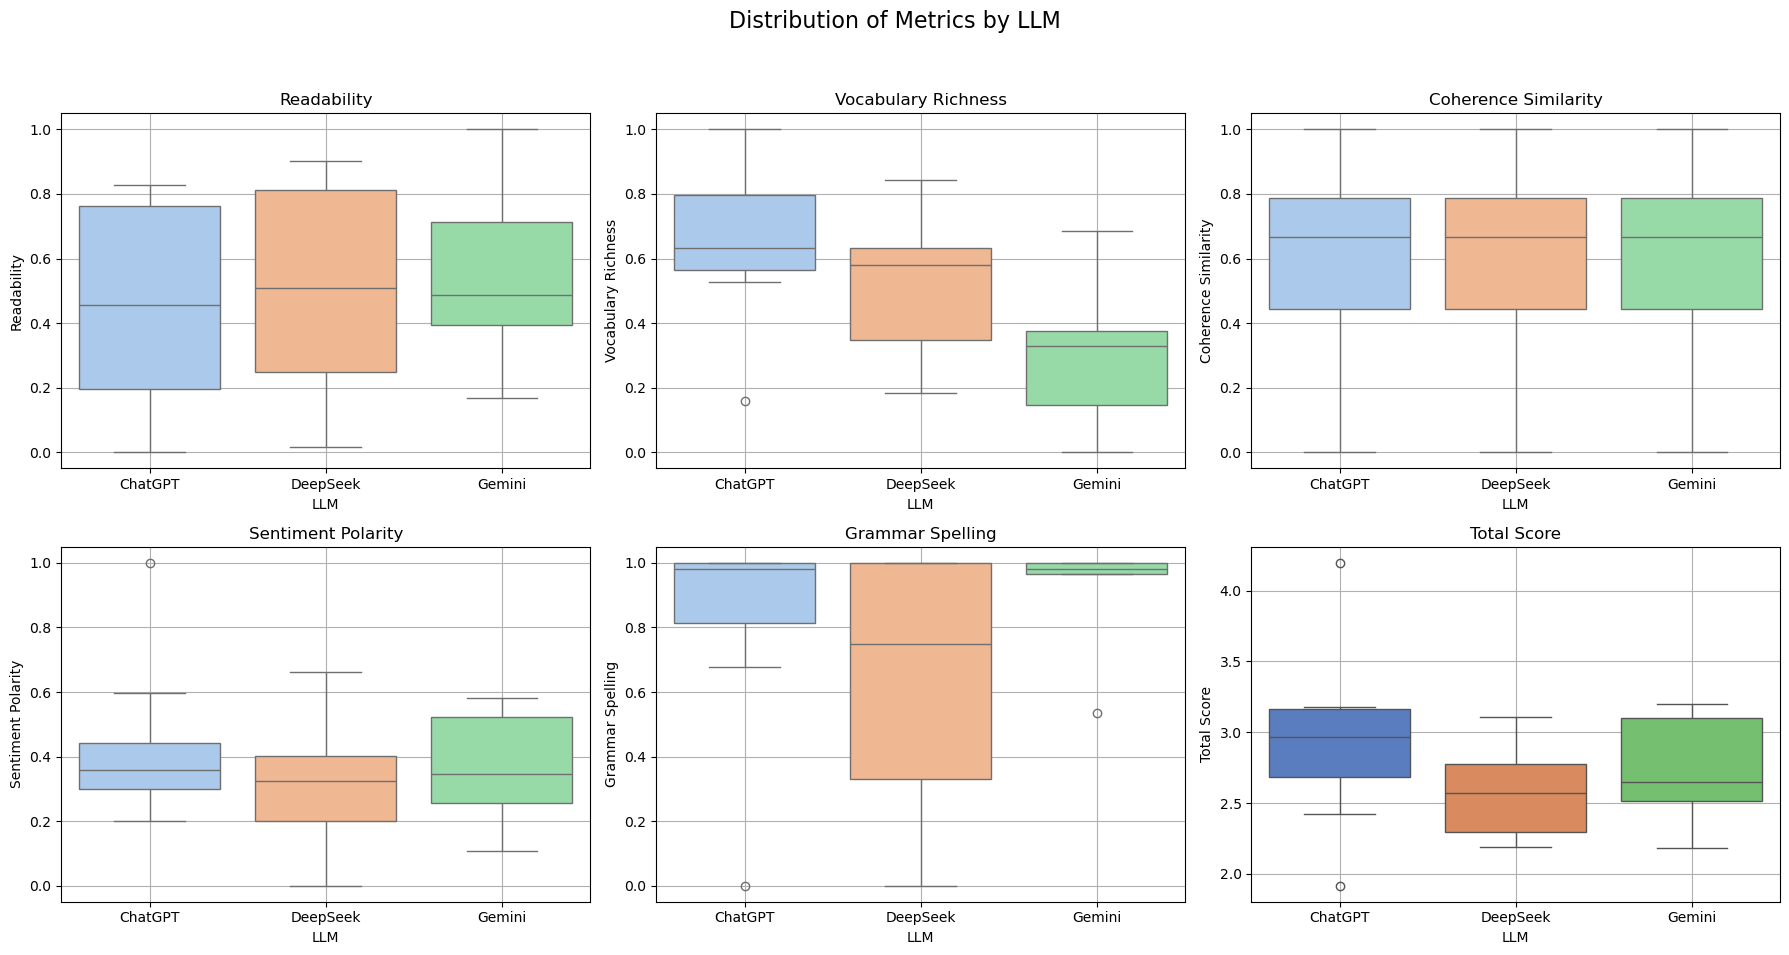

In [15]:
# ---- Set 1: Boxplots of Metrics Across LLMs ---- #
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Metrics by LLM', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axs[i // 3, i % 3]
    sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
    ax.set_title(metric)
    ax.grid(True)

# Last subplot: Total Score
sns.boxplot(x='LLM', y='Total Score', data=df_all, ax=axs[1, 2], palette='muted')
axs[1, 2].set_title('Total Score')
axs[1, 2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3936345611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3936345611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1544\3936345611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
C:\Users\ashik\AppData\Local\Temp\ipyker

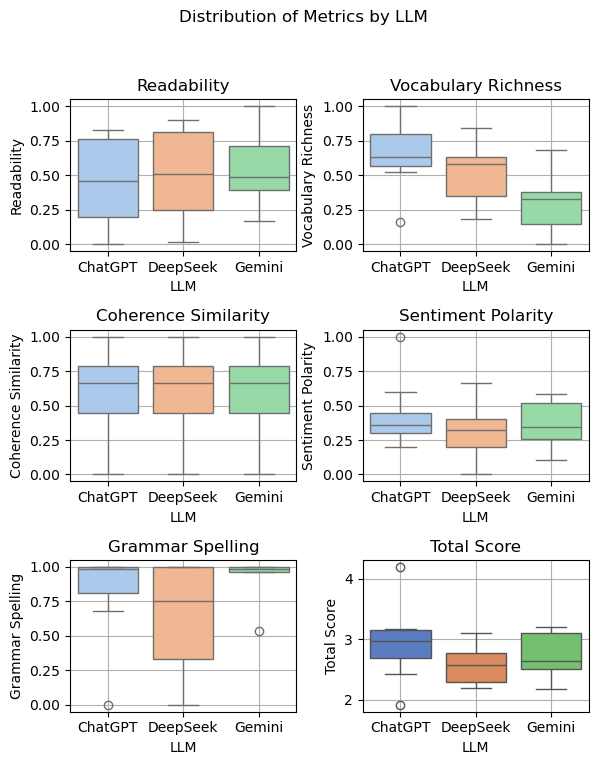

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(6, 8))
fig.suptitle('Distribution of Metrics by LLM', fontsize=12)

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    sns.boxplot(x='LLM', y=metric, data=df_all, ax=ax, palette='pastel')
    ax.set_title(metric)
    ax.grid(True)

# Last subplot: Total Score
sns.boxplot(x='LLM', y='Total Score', data=df_all, ax=axs[2, 1], palette='muted')
axs[2, 1].set_title('Total Score')
axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\ashik\AppData\Local\Temp\ipykernel_1568\447003201.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Creativity', 'Factual Accuracy', 'Open Ended', 'Technical Explaintion'], rotation=45, ha='right')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1568\447003201.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Creativity', 'Factual Accuracy', 'Open Ended', 'Technical Explaintion'], rotation=45, ha='right')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1568\447003201.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Creativity', 'Factual Accuracy', 'Open Ended', 'Technical Explaintion'], rotation=45, ha='right')
C:\Users\ashik\AppData\Local\Temp\ipykernel_1568\447003

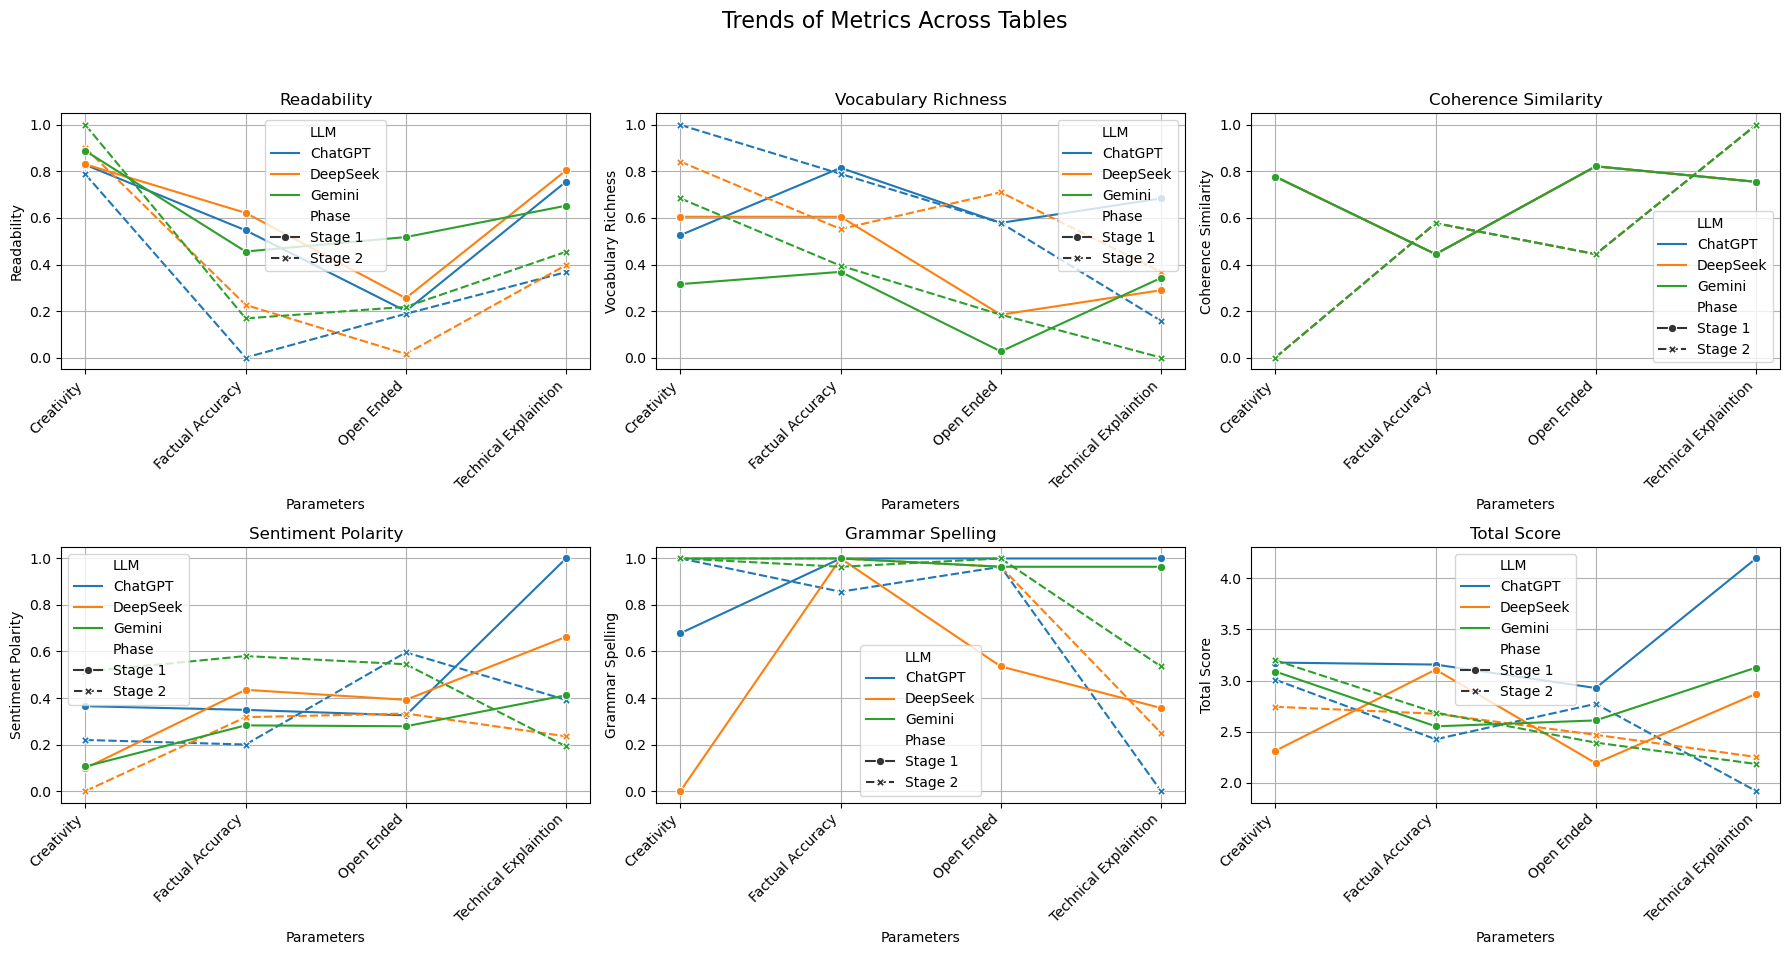

In [5]:
# ---- Set 2: Metric Trends Across Tables ---- #
fig2, axs2 = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Trends of Metrics Across Tables', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axs2[i // 3, i % 3]
    sns.lineplot(data=df_all, x='Table', y=metric, hue='LLM', style='Phase', markers=True, ax=ax)
    ax.set_xlabel('Parameters')
    ax.set_title(metric)
    ax.set_xticklabels(['Creativity', 'Factual Accuracy', 'Open Ended', 'Technical Explaintion'], rotation=45, ha='right')
    ax.grid(True)

# Last subplot: Total Score
sns.lineplot(data=df_all, x='Table', y='Total Score', hue='LLM', style='Phase', markers=True, ax=axs2[1, 2])
plt.xlabel('Parameters')
axs2[1, 2].set_title('Total Score')
axs2[1, 2].set_xticklabels(['Creativity', 'Factual Accuracy', 'Open Ended', 'Technical Explaintion'], rotation=45, ha='right')
axs2[1, 2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\ashik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


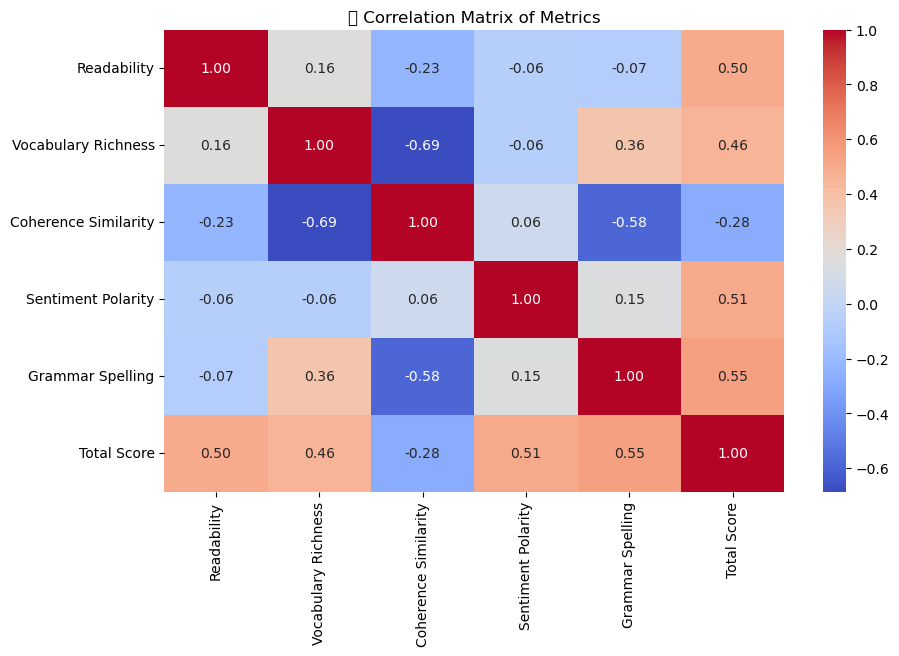

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (just numeric columns)
corr = df_all[['Readability', 'Vocabulary Richness', 'Coherence Similarity', 
               'Sentiment Polarity', 'Grammar Spelling', 'Total Score']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📊 Correlation Matrix of Metrics')
plt.show()


In [7]:
from scipy.stats import f_oneway

for metric in metrics + ['Total Score']:
    gpt = df_all[df_all['LLM'] == 'ChatGPT'][metric]
    deep = df_all[df_all['LLM'] == 'DeepSeek'][metric]
    gem = df_all[df_all['LLM'] == 'Gemini'][metric]
    
    f_stat, p_val = f_oneway(gpt, deep, gem)
    print(f" {metric}: F = {f_stat:.4f}, p = {p_val:.4f}")


 Readability: F = 0.1485, p = 0.8629
 Vocabulary Richness: F = 4.7809, p = 0.0195
 Coherence Similarity: F = 0.0000, p = 1.0000
 Sentiment Polarity: F = 0.6348, p = 0.5399
 Grammar Spelling: F = 1.6524, p = 0.2156
 Total Score: F = 1.2286, p = 0.3129


In [8]:
from scipy.stats import ttest_ind
from itertools import combinations

for metric in metrics + ['Total Score']:
    print(f"\n🔬 {metric}")
    for llm1, llm2 in combinations(df_all['LLM'].unique(), 2):
        scores1 = df_all[df_all['LLM'] == llm1][metric]
        scores2 = df_all[df_all['LLM'] == llm2][metric]
        t_stat, p_val = ttest_ind(scores1, scores2, equal_var=False)
        print(f"{llm1} vs {llm2} ➤ t = {t_stat:.3f}, p = {p_val:.4f}")



🔬 Readability
ChatGPT vs DeepSeek ➤ t = -0.293, p = 0.7740
ChatGPT vs Gemini ➤ t = -0.558, p = 0.5854
DeepSeek vs Gemini ➤ t = -0.243, p = 0.8112

🔬 Vocabulary Richness
ChatGPT vs DeepSeek ➤ t = 1.030, p = 0.3208
ChatGPT vs Gemini ➤ t = 2.986, p = 0.0100
DeepSeek vs Gemini ➤ t = 2.082, p = 0.0562

🔬 Coherence Similarity
ChatGPT vs DeepSeek ➤ t = 0.000, p = 1.0000
ChatGPT vs Gemini ➤ t = 0.000, p = 1.0000
DeepSeek vs Gemini ➤ t = 0.000, p = 1.0000

🔬 Sentiment Polarity
ChatGPT vs DeepSeek ➤ t = 1.039, p = 0.3174
ChatGPT vs Gemini ➤ t = 0.606, p = 0.5554
DeepSeek vs Gemini ➤ t = -0.571, p = 0.5773

🔬 Grammar Spelling
ChatGPT vs DeepSeek ➤ t = 0.924, p = 0.3717
ChatGPT vs Gemini ➤ t = -0.859, p = 0.4108
DeepSeek vs Gemini ➤ t = -1.886, p = 0.0914

🔬 Total Score
ChatGPT vs DeepSeek ➤ t = 1.427, p = 0.1832
ChatGPT vs Gemini ➤ t = 0.816, p = 0.4316
DeepSeek vs Gemini ➤ t = -0.872, p = 0.3984


In [9]:
print(df_all.groupby('LLM')['Total Score'].mean().sort_values(ascending=False))

LLM
ChatGPT     2.946899
Gemini      2.729011
DeepSeek    2.576748
Name: Total Score, dtype: float64


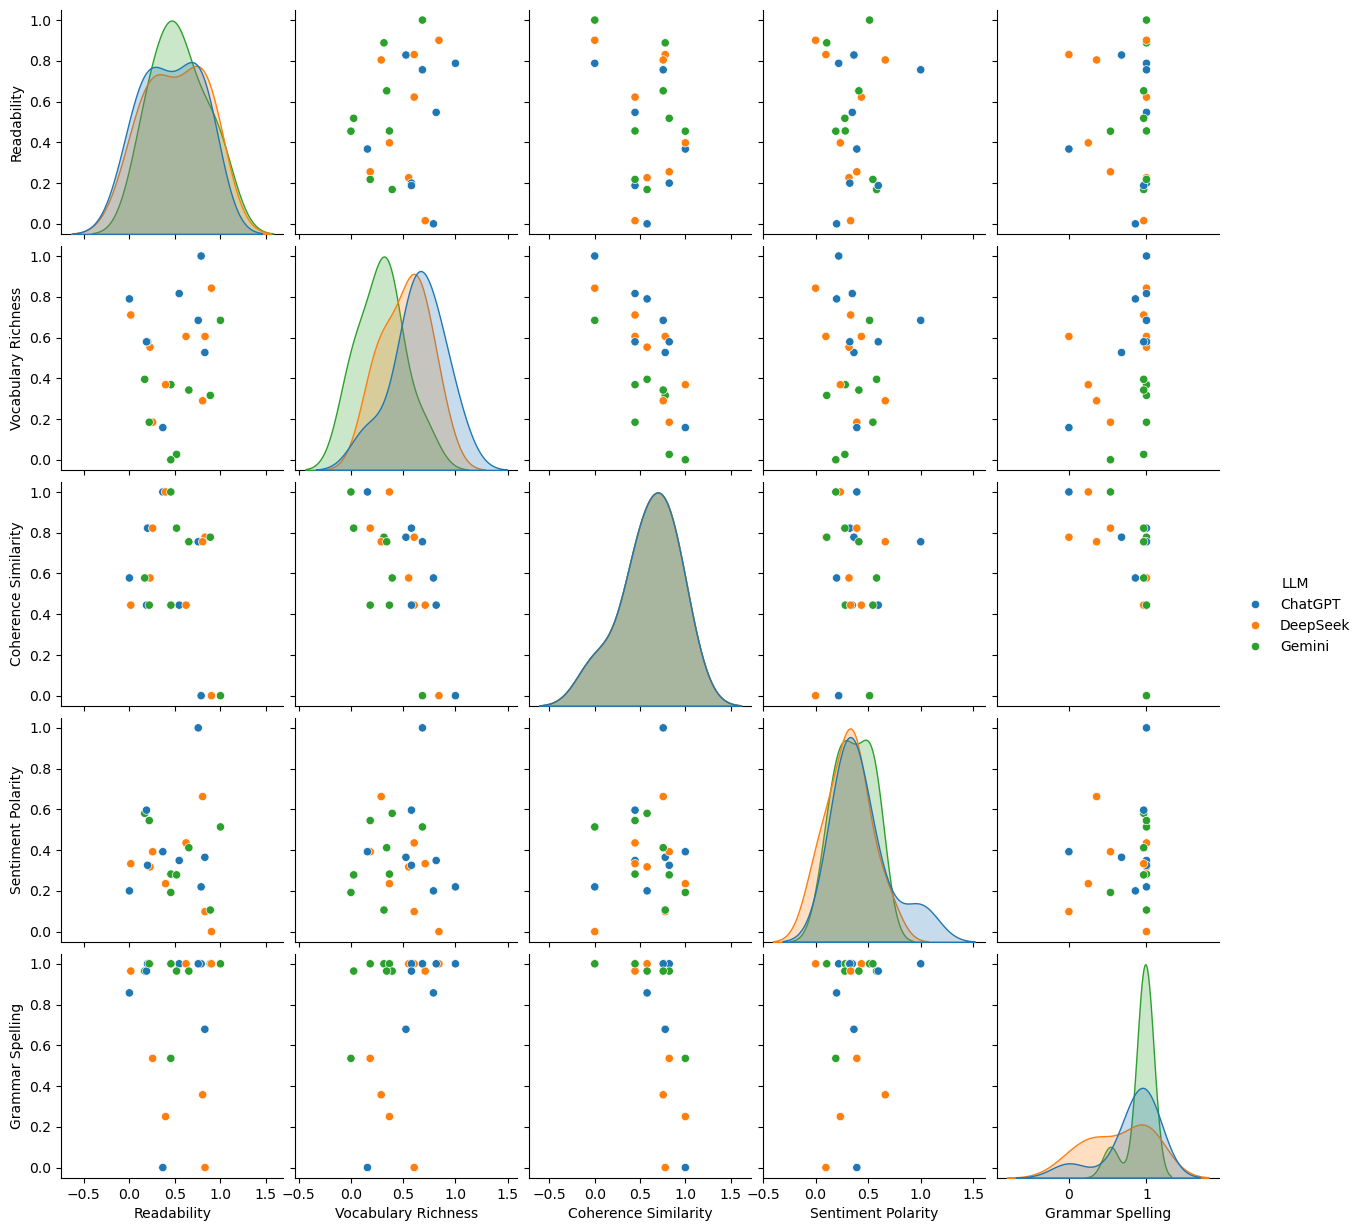

In [10]:
import seaborn as sns
sns.pairplot(df_all[metrics + ['LLM']], hue='LLM')


# Just test

In [20]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming your full DataFrame with all stages and tables is named 'df_all'
# And it has a column 'LLM' and metric columns like 'Readability', etc.

metrics = ['Readability', 'Vocabulary Richness', 'Coherence Similarity', 'Sentiment Polarity', 'Grammar Spelling']

print("One-way ANOVA (F-test) Results by Metric:\n")

for metric in metrics:
    # Get values for each LLM
    chatgpt_values = df_all[df_all['LLM'] == 'ChatGPT'][metric].dropna()
    deepseek_values = df_all[df_all['LLM'] == 'DeepSeek'][metric].dropna()
    gemini_values = df_all[df_all['LLM'] == 'Gemini'][metric].dropna()

    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(chatgpt_values, deepseek_values, gemini_values)

    result = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{metric:25s} → F = {f_stat:.2f}, p = {p_val:.4f} → {result}")


One-way ANOVA (F-test) Results by Metric:

Readability               → F = 0.15, p = 0.8629 → Not Significant
Vocabulary Richness       → F = 4.78, p = 0.0195 → Significant
Coherence Similarity      → F = 0.00, p = 1.0000 → Not Significant
Sentiment Polarity        → F = 0.63, p = 0.5399 → Not Significant
Grammar Spelling          → F = 1.65, p = 0.2156 → Not Significant


In [21]:
print("\nMean Scores by LLM:\n")
print(df_all.groupby('LLM')[metrics].mean().round(2))



Mean Scores by LLM:

          Readability  Vocabulary Richness  Coherence Similarity  \
LLM                                                                
ChatGPT          0.46                 0.64                   0.6   
DeepSeek         0.51                 0.52                   0.6   
Gemini           0.54                 0.29                   0.6   

          Sentiment Polarity  Grammar Spelling  
LLM                                             
ChatGPT                 0.43              0.81  
DeepSeek                0.31              0.64  
Gemini                  0.36              0.93  


In [13]:
# Normalize all metrics (0 to 1)
# Reverse Grammar score (lower = better → higher = better)
# Then average all for each LLM

df_normalized = df_all.copy()
for col in metrics:
    if col != 'Grammar Spelling':
        df_normalized[col] = (df_all[col] - df_all[col].min()) / (df_all[col].max() - df_all[col].min())
    else:
        df_normalized[col] = 1 - (df_all[col] - df_all[col].min()) / (df_all[col].max() - df_all[col].min())

# Average per LLM
summary = df_normalized.groupby('LLM')[metrics].mean()
summary['Total Score'] = summary.mean(axis=1)
print(summary.sort_values('Total Score', ascending=False))


          Readability  Vocabulary Richness  Coherence Similarity  \
LLM                                                                
ChatGPT      0.459292             0.641447              0.602778   
DeepSeek     0.506526             0.519737              0.602778   
Gemini       0.544463             0.289474              0.602778   

          Sentiment Polarity  Grammar Spelling  Total Score  
LLM                                                          
ChatGPT             0.430882          0.187500     0.464380  
DeepSeek            0.309314          0.361607     0.459992  
Gemini              0.363725          0.071429     0.374374  


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for metric in metrics:
    print(f"\nTukey HSD for {metric}")
    tukey = pairwise_tukeyhsd(endog=df_all[metric], groups=df_all['LLM'], alpha=0.05)
    print(tukey)



Tukey HSD for Readability
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 ChatGPT DeepSeek   0.0472 0.9512 -0.3475  0.442  False
 ChatGPT   Gemini   0.0852 0.8507 -0.3096 0.4799  False
DeepSeek   Gemini   0.0379 0.9682 -0.3568 0.4327  False
-------------------------------------------------------

Tukey HSD for Vocabulary Richness
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 ChatGPT DeepSeek  -0.1217 0.5529 -0.4131  0.1697  False
 ChatGPT   Gemini   -0.352 0.0163 -0.6434 -0.0606   True
DeepSeek   Gemini  -0.2303  0.139 -0.5217  0.0612  False
--------------------------------------------------------

Tukey HSD for Coherence Similarity
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
-